# Hands-on Exercise CLASS Module

In [13]:
import numpy as np
import pandas as pd
#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns


#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions


In [14]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [30]:

depth = np.array([2,4,6,8,10,50])
dt_score = np.empty(len(depth))
for i,d in enumerate(depth) :
    dt_score[i] = cross_val_score(DecisionTreeClassifier(max_depth= d), Data3_X, Data3_Y, cv=30, scoring='accuracy').mean()
    print(" Mean Accuracy for max_depth " +str(d)+ " : "+ str(dt_scores[i]))
    

 Mean Accuracy for max_depth 2 : 0.8623015873015873
 Mean Accuracy for max_depth 4 : 0.9718253968253968
 Mean Accuracy for max_depth 6 : 0.9694444444444446
 Mean Accuracy for max_depth 8 : 0.9571428571428572
 Mean Accuracy for max_depth 10 : 0.9496031746031748
 Mean Accuracy for max_depth 50 : 0.9468253968253969


<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

In [45]:
dt_score.min()


0.8623015873015873

<span style="color:green">**Answer: Lowest accuracy is observed for max_depth = 2.
    <br> This is possibly because of underfitting. ** </span>  

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

In [48]:
print( "Accuracy for max_depth 50" + str(dt_score[len(depth)-1]))
print( "Difference in accuracy : " + str(dt_score.max() - dt_score[len(depth)-1]) )

Accuracy for max_depth 500.9468253968253969
Difference in accuracy : 0.02499999999999991


<span style="color:green">**Answer: Phenomena is called Overfitting. While Overfitting data has a high accuracy for trainning dta, we loose the ability to generalise and thus the accuracy on unseen test data decreases. ** </span> 

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

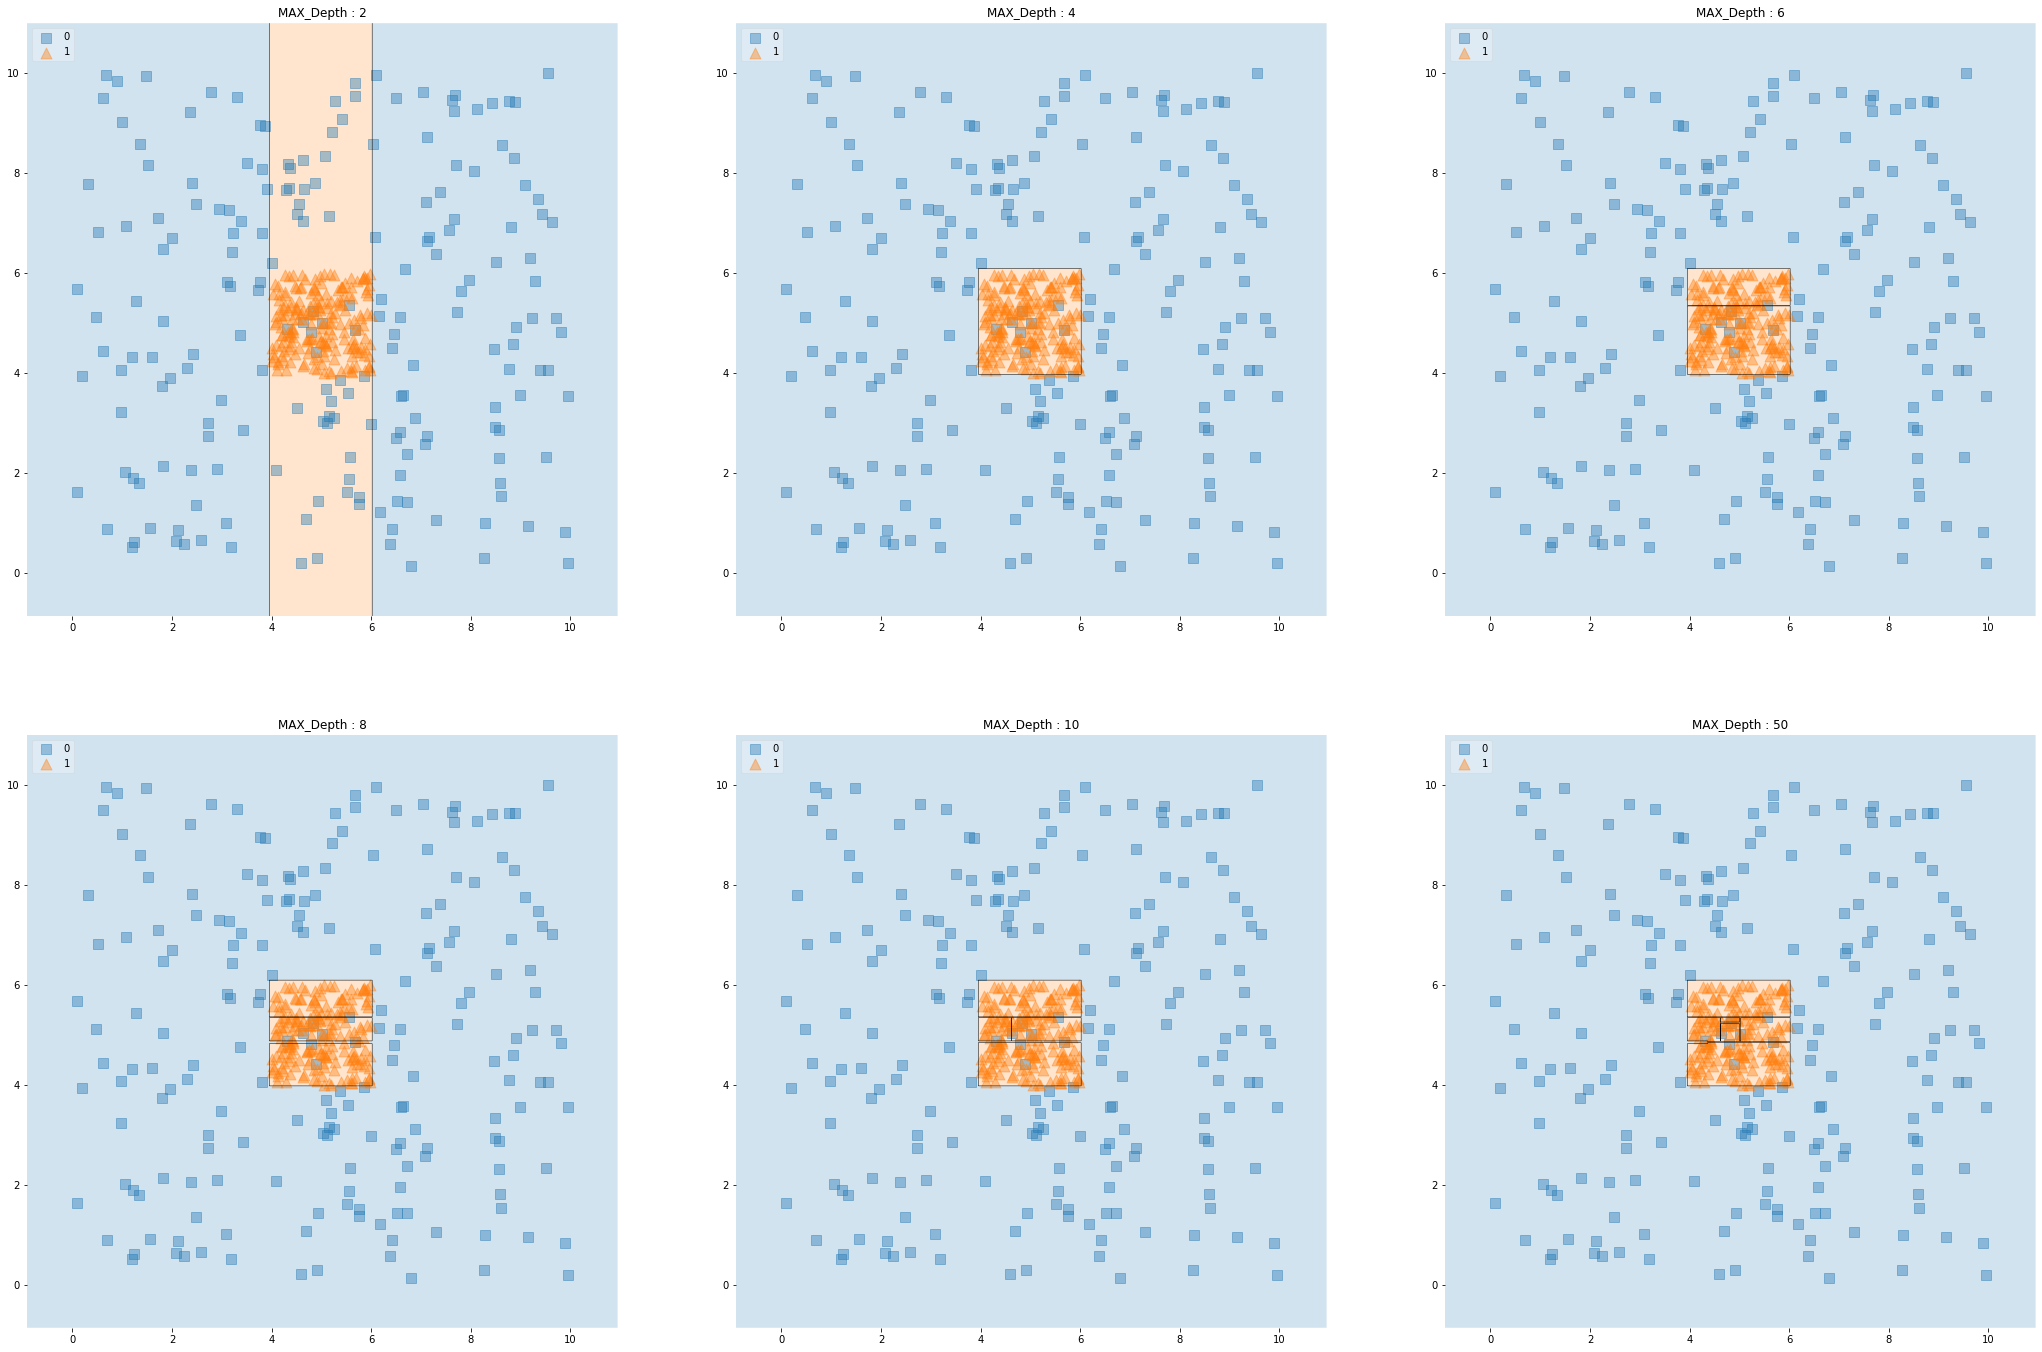

In [23]:
# Defining Dtree for each depth
dt_2 = DecisionTreeClassifier(max_depth=2)
dt_4 = DecisionTreeClassifier(max_depth=4)
dt_6 = DecisionTreeClassifier(max_depth=6)
dt_8 = DecisionTreeClassifier(max_depth=8)
dt_10 = DecisionTreeClassifier(max_depth=10)
dt_50 = DecisionTreeClassifier(max_depth=50)

# Creating a list of classifiers and their names for plotting
clf_list = [dt_2,dt_4,dt_6,dt_8, dt_10, dt_50]
labels = ['MAX_Depth : 2','MAX_Depth : 4','MAX_Depth : 6','MAX_Depth : 8', 'MAX_Depth : 10', 'MAX_Depth : 50']

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

# Plotting the decision boundaries
fig = plt.figure(figsize=(36,24))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,3,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label)
plt.show()



<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer: Max depth of 4 seems to be better suited for the data. Because It maintains a balance between underfitting and overfitting, resulting in a higher accuracy.** </span> 

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [25]:
#Computing Mean accuracy of 10-fold cross validated KNN classifier w.r.t n_neighbors
neighbors = np.array([1, 5, 10, 50])
knn_score = np.empty(len(neighbors))
for i,n in enumerate(neighbors) :
    knn_score[i] = cross_val_score(KNeighborsClassifier(n_neighbors= n), Data2_X, Data2_Y, cv=10, scoring='accuracy').mean()
    print(" Mean Accuracy for n_neighbour = " +str(n)+ " is : "+ str(knn_score[i]))
    

 Mean Accuracy for n_neighbour = 1 is : 0.9125
 Mean Accuracy for n_neighbour = 5 is : 0.9349999999999999
 Mean Accuracy for n_neighbour = 10 is : 0.9400000000000001
 Mean Accuracy for n_neighbour = 50 is : 0.9412499999999999


<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer: Lowest accuracy is for n_neighbour = 1. This is called overfitting.  ** </span>  

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

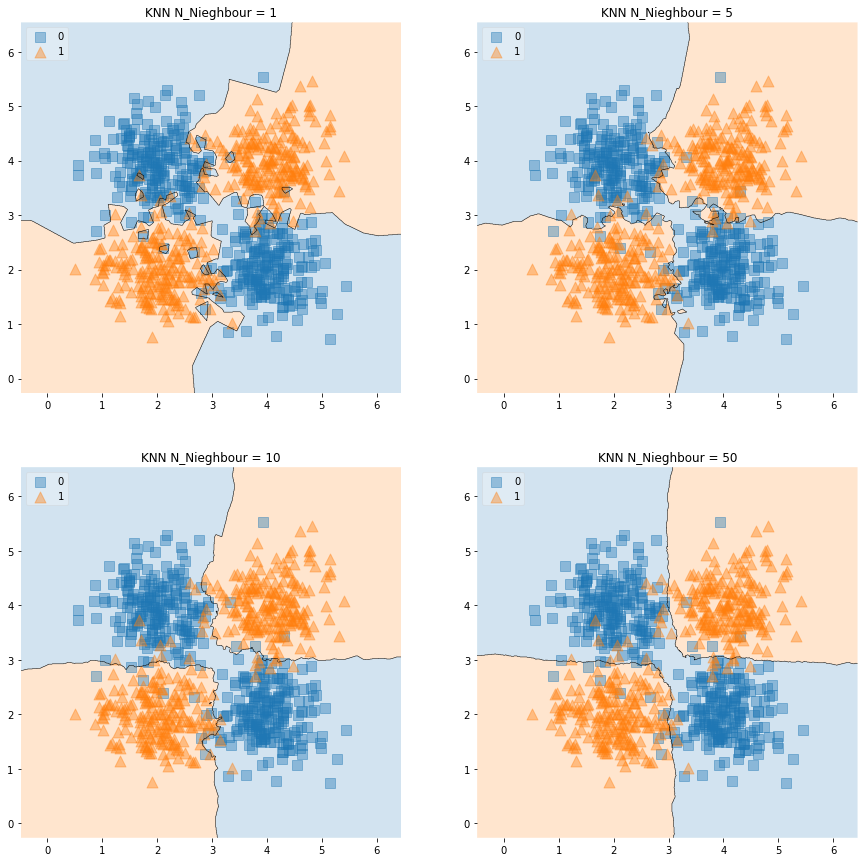

In [4]:
# Defining Dtree for each depth
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_50 = KNeighborsClassifier(n_neighbors=50)

# Creating a list of classifiers and their names for plotting
clf_list = [knn_1,knn_5,knn_10, knn_50]
labels = ['KNN N_Nieghbour = 1','KNN N_Nieghbour = 5','KNN N_Nieghbour = 10','KNN N_Nieghbour = 50']

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

# Plotting the decision boundaries
fig = plt.figure(figsize=(15,15))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label)
plt.show()



<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer: As as n_neighbor is increasing the boundary is becoming more smoother.** </span>   

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [29]:
nb = GaussianNB()
nb_score_1 = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy').mean()
nb_score_2 = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy').mean()
nb_score_3 = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy').mean()
nb_score_4 = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy').mean()

score_nb = np.array([nb_score_1,nb_score_2,nb_score_3,nb_score_4])

for i in range(4) :
    print("Mean accuracy of NB Classifier for Data " + str(i + 1)+ " : " + str(score_nb[i]))    

Mean accuracy of NB Classifier for Data 1 : 0.9675
Mean accuracy of NB Classifier for Data 2 : 0.049999999999999996
Mean accuracy of NB Classifier for Data 3 : 0.96
Mean accuracy of NB Classifier for Data 4 : 0.9640736294517807


<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer: NB performed poorly on the 2nd dataset. 
    <br> Reason: Naive Baye's assumes that the attirubtes used for modelling are inpendent. But for data 2 there is a strong linear relation between the two attributes. ** </span>  

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

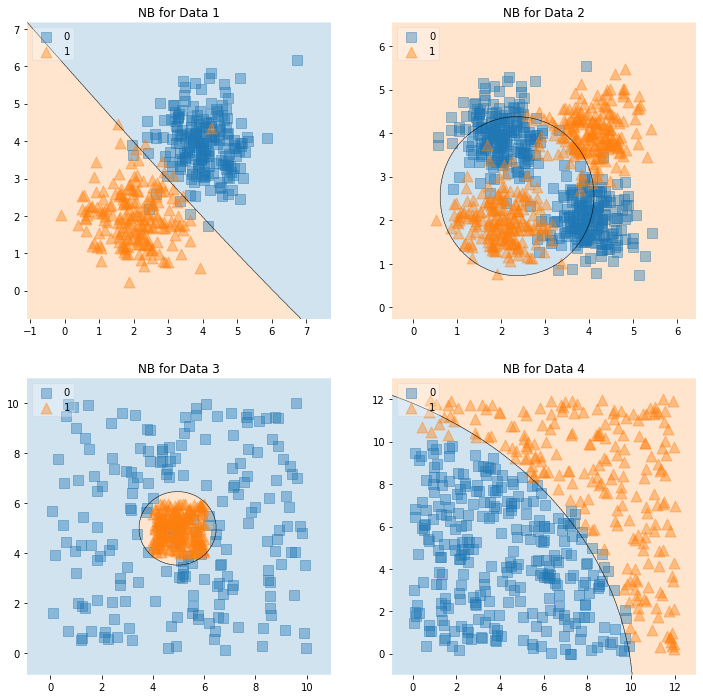

In [32]:
nb = GaussianNB()

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

#Plooting each classifier

fig = plt.figure(figsize=(12,12))

#NB_1
ax = plt.subplot(2,2,1)
nb.fit(Data1_X, Data1_Y)
fig = plot_decision_regions(X=Data1_X, y=Data1_Y, clf=nb, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB for Data 1')


#NB_2

ax = plt.subplot(2,2,2)
nb.fit(Data2_X, Data2_Y)
fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=nb, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB for Data 2')


#NB_3

ax = plt.subplot(2,2,3)
nb.fit(Data3_X, Data3_Y)
fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=nb, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB for Data 3')


#NB_4

ax = plt.subplot(2,2,4)
nb.fit(Data4_X, Data4_Y)
fig = plot_decision_regions(X=Data4_X, y=Data4_Y, clf=nb, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB for Data 4')
plt.show()




<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer: Data 1 : Its a line
    <br> Data 2, Data 3: Its a closed elipse (circular)
    <br> Data 4: Its a curve** </span>  

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer:NB performed poorly on Dataset 2. This is because there is high linear coorelation between the attributes whereas the NB assumes that to be independent when classifying. ** </span>  

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

<span style="color:green">**Answer: Data 1 > Data 4 > Data 3 > Data 2
    <br> Its difficult to confidently say between Data 3 and Data 2 by just visually seeing the data.** </span>


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [6]:
svm_linear = SVC(C=0.5, kernel='linear')



svm_linear_1 = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy').mean()
svm_linear_2 = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy').mean()
svm_linear_3 = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy').mean()
svm_linear_4 = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy').mean()

score_svm_linear= np.array([svm_linear_1,svm_linear_2,svm_linear_3,svm_linear_4])

for i in range(4) :
    print("Mean accuracy of 10-fold Linear SVM Classifier for Data " + str(i + 1)+ " : " + str(score_svm_linear[i]))    

Mean accuracy of 10-fold Linear SVM Classifier for Data 1 : 0.9674999999999999
Mean accuracy of 10-fold Linear SVM Classifier for Data 2 : 0.14125000000000001
Mean accuracy of 10-fold Linear SVM Classifier for Data 3 : 0.6425000000000001
Mean accuracy of 10-fold Linear SVM Classifier for Data 4 : 0.9259463785514207


<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer: Data 1 > Data 4 > Data 3 > Data 2** </span>


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

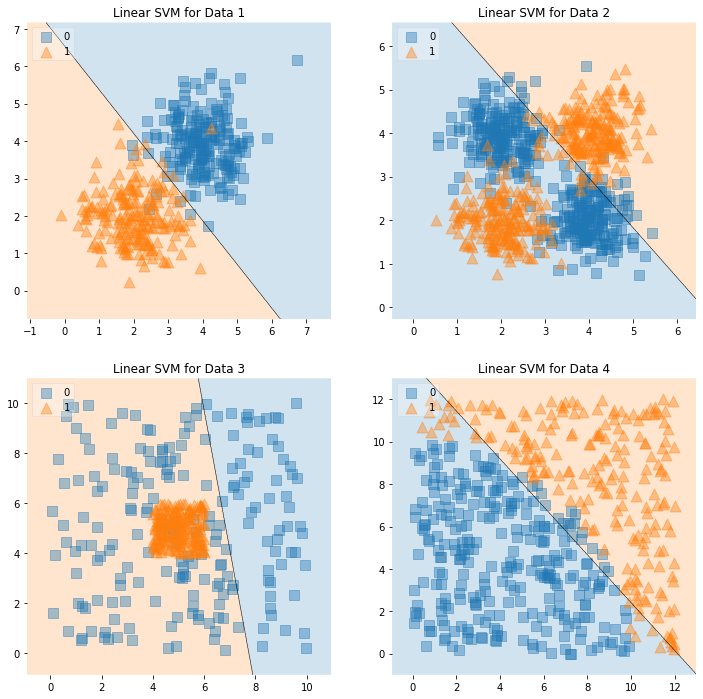

In [33]:
sv = SVC(C=0.5, kernel='linear')

# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

#Plooting each classifier

fig = plt.figure(figsize=(12,12))

#NB_1
ax = plt.subplot(2,2,1)
sv.fit(Data1_X, Data1_Y)
fig = plot_decision_regions(X=Data1_X, y=Data1_Y, clf=sv, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('Linear SVM for Data 1')


#NB_2

ax = plt.subplot(2,2,2)
sv.fit(Data2_X, Data2_Y)
fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=sv, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('Linear SVM for Data 2')


#NB_3

ax = plt.subplot(2,2,3)
sv.fit(Data3_X, Data3_Y)
fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=sv, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('Linear SVM for Data 3')


#NB_4

ax = plt.subplot(2,2,4)
sv.fit(Data4_X, Data4_Y)
fig = plot_decision_regions(X=Data4_X, y=Data4_Y, clf=sv, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('Linear SVM for Data 4')
plt.show()




<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer: Clearly from the the above graphs Classes are well seperated in the following order: Data1 > Data4 > Data3 > Data2** </span>


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [15]:
degree = [1,2,3,6]

for i in degree : 
    svm_poly_scores = cross_val_score(SVC(C=0.5, kernel='poly',degree= i, gamma = 'auto'), Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Mean accuracy of 10-fold Polynomial SVM Classifier for Degree " + str(i)+ " : " + str(svm_poly_scores.mean()))

Mean accuracy of 10-fold Polynomial SVM Classifier for Degree 1 : 0.13375
Mean accuracy of 10-fold Polynomial SVM Classifier for Degree 2 : 0.865
Mean accuracy of 10-fold Polynomial SVM Classifier for Degree 3 : 0.8762500000000001
Mean accuracy of 10-fold Polynomial SVM Classifier for Degree 6 : 0.8787500000000001


<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

<span style="color:green">**Answer: Degree 3 > Degree 2 > Degree 1** </span>


<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

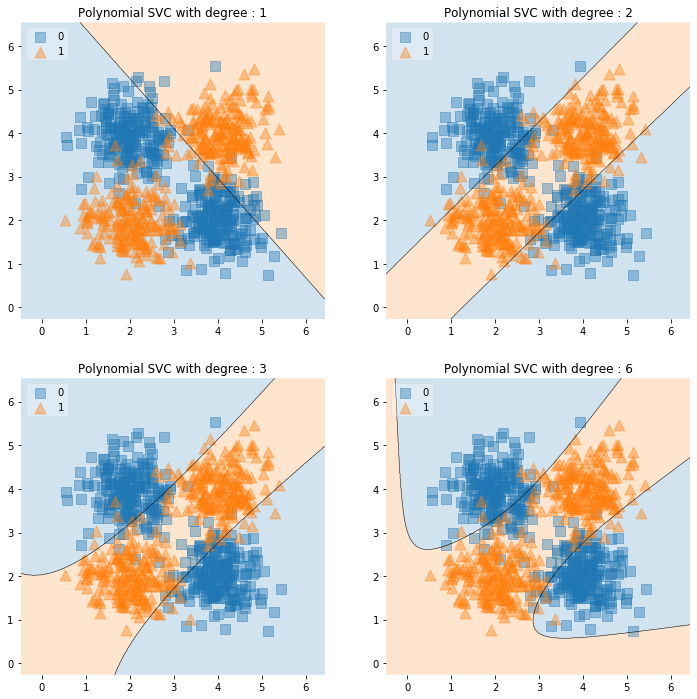

In [14]:
#List of classifier
clf_list = []  
degree = [1,2,3,6]
for i in degree :
        SVC_P =SVC(C=0.5, kernel='poly',degree= i, gamma = 'auto')
        clf_list.append(SVC_P)
        
#List of labels
labels = []
for i in degree :
    lab = str("Polynomial SVC with degree : " + str(i))
    labels.append(lab)
    
# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

# Plotting the decision boundaries
fig = plt.figure(figsize=(12,12))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label)
plt.show()



    
        

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer: Clearly from the figures Degree 3 SVC classifier is able to make more accurate decision boundaries than Degree 2 and Degree 1. As the degree of plynomial increases the classifier is able to make a more clear linear distinction in a high dimensional space for the given data. 
    <br> Plotted for degree 6, out of curosity. ** </span>



<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [16]:
gamma = [0.01,0.1,1]

for g in gamma : 
    svm_rbf_scores = cross_val_score(SVC(C=0.5, kernel='rbf', gamma = g), Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Mean accuracy of 10-fold Polynomial SVM Classifier with Gamma " + str(g)+ " : " + str(svm_rbf_scores.mean()))


Mean accuracy of 10-fold Polynomial SVM Classifier with Gamma 0.01 : 0.30124999999999996
Mean accuracy of 10-fold Polynomial SVM Classifier with Gamma 0.1 : 0.93625
Mean accuracy of 10-fold Polynomial SVM Classifier with Gamma 1 : 0.9399999999999998


<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer: Gamma 1 > Gamma 0.1 > Gamma 0.01 ** </span>


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

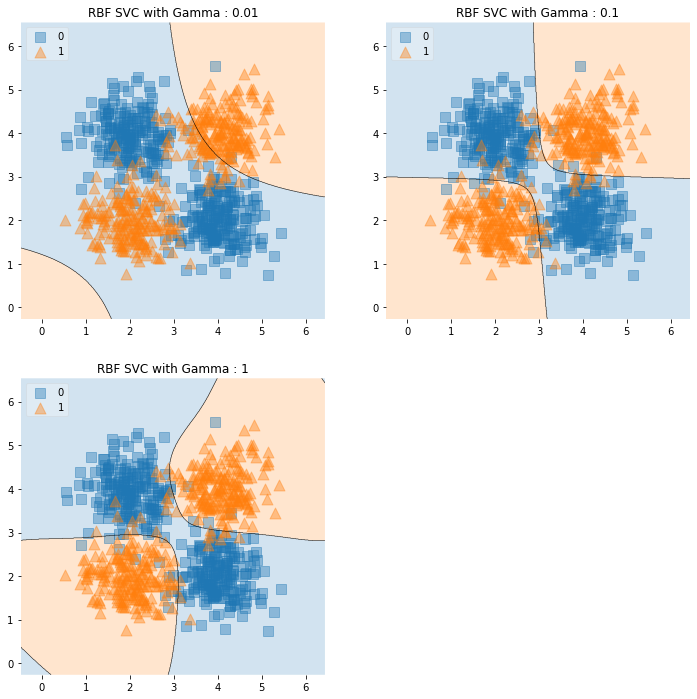

In [16]:
#List of classifier
clf_list = []  
gamma = [0.01,0.1,1]
for g in gamma :
        SVC_P =SVC(C=0.5, kernel='rbf',gamma = g)
        clf_list.append(SVC_P)
        
#List of labels
labels = []
for g in gamma :
    lab = str("RBF SVC with Gamma : " + str(g))
    labels.append(lab)
    
# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.4}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.4}

# Plotting the decision boundaries
fig = plt.figure(figsize=(12,12))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(label)
plt.show()



    
        

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer: Clearly from the boundaries above (observing the overalps) the Data is well seperated in the following order Gamma 1 > Gamma 0.1 > Gamma 0.01** </span>




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data2? Explain your reason.

<span style="color:green">**Answer: SVM with RBF Kernel is better suited for Data 2. It gives a hire accuracy when compared to polynoimal Kernel.  ** </span>




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [22]:
cv = [3,4,5,6]
for c in cv : 
    svm_rbf_scores = cross_val_score(SVC(C=0.5, kernel='rbf', gamma = 0.1), Data2_X, Data2_Y, cv=c, scoring='accuracy')
    print("Mean accuracy of " + str(c) + " fold RBF SVM : " + str(svm_rbf_scores.mean()))


Mean accuracy of 3 fold RBF SVM : 0.903826731006621
Mean accuracy of 4 fold RBF SVM : 0.91625
Mean accuracy of 5 fold RBF SVM : 0.9275
Mean accuracy of 6 fold RBF SVM : 0.9325531433740389


<span style="color:green">**Answer:  Mean accuracy for the given data is higher for a larger number of cv. A high value of cv gives more samples to estimate a more accurate confidence interval for the model. 
    <br> It's not always that a larger folds will result in higher mean accuracy. Purpose of fold is to have a better statistical estimate of data on an unseen data. ** </span> 

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [12]:
# List of Classifiers
clf_list = [DecisionTreeClassifier(max_depth=4),GaussianNB(),KNeighborsClassifier(n_neighbors=5),SVC(C=0.5, kernel='linear'),
            SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto'), SVC(C = 0.5, kernel='rbf', gamma=0.1)]
model_name = ["DT","NB","KNN","Linear SVM","Polynomial SVM", "RBF SVM" ]

# Accuracies
accuracy = {}
for clf,m in zip(clf_list,model_name) :
    acu_score = cross_val_score(clf, Data3_X, Data3_Y, cv=30, scoring='accuracy').mean()
    accuracy[m] = acu_score

#Precision
precision = {}
for clf,m in zip(clf_list,model_name) :
    prec_score = cross_val_score(clf, Data3_X, Data3_Y, cv=30, scoring='precision').mean()
    precision[m]= prec_score


#Data Frame for Accuracy
df_acuracy = pd.DataFrame(accuracy.items(), columns=['Model name', 'Accuracy'])

#Data frame for Precision
df_precision = pd.DataFrame(precision.items(), columns=['Model name', 'Precision'])


In [15]:
# Accuracy in descending order
df_acuracy.sort_values("Accuracy", axis = 0, ascending = False)

,Model name,Accuracy
0,DT,0.971825
1,NB,0.959127
2,KNN,0.949206
5,RBF SVM,0.939286
4,Polynomial SVM,0.848413
3,Linear SVM,0.642857


In [17]:
#Precision in descending order
df_precision.sort_values("Precision", axis = 0, ascending = False)

,Model name,Precision
0,DT,0.960450
1,NB,0.932857
2,KNN,0.918831
5,RBF SVM,0.903686
4,Polynomial SVM,0.792371
3,Linear SVM,0.588170


<span style="color:green">**Answer: Yes the order of both the Accuracy and Precision w.r.t Classifier is same for the given data. ** </span> 



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [18]:
SVM = SVC(C=0.5, kernel='linear');
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=SVM, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Bagging Accuracy: 0.56 (+/- 0.08) #estimators: 1
Bagging Accuracy: 0.64 (+/- 0.09) #estimators: 2
Bagging Accuracy: 0.65 (+/- 0.07) #estimators: 3
Bagging Accuracy: 0.65 (+/- 0.05) #estimators: 4
Bagging Accuracy: 0.63 (+/- 0.02) #estimators: 5
Bagging Accuracy: 0.68 (+/- 0.03) #estimators: 10


<span style="color:green">**Answer: Bagging lead to a decrease in the variance, esepeciall from n_est = 1 to n_est = 2. 
    <br> Also there is sharp increase in the mean from n_est = 1 to n_est = 2.  As we can see higher the number of n_est more is the reduction in std (upto a point) ** </span> 



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

In [ ]:
SVM = SVC(C=0.5, kernel='linear')
n_est_list = [1,2,3,4,5,10,20]

fig = plt.figure(figsize=(16,8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=SVM, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
plt.show()

/users/PES0801/gargrs/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

<span style="color:green">**Answer: As the estimator number is increasing the blue region is also increasing. But the boundaries are fluctuating.** </span> 



<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [19]:
# Accuracy of base classifier
dt = DecisionTreeClassifier(max_depth=2)
print(cross_val_score(dt, Data2_X, Data2_Y, cv=10, scoring='accuracy').mean())
print(cross_val_score(dt, Data2_X, Data2_Y, cv=10, scoring='accuracy').std())


0.88125
0.028090256317805297


In [27]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 4
Boosting Accuracy: 0.92 (+/- 0.03) #estimators: 5
Boosting Accuracy: 0.92 (+/- 0.04) #estimators: 10
Boosting Accuracy: 0.91 (+/- 0.04) #estimators: 20
Boosting Accuracy: 0.91 (+/- 0.02) #estimators: 40


<span style="color:green">**Answer: With Boosting the mean accuracy of the data increased (with n_est = 5) when compared to the base classifier with. Std of accuracy remains almost same.** </span> 



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

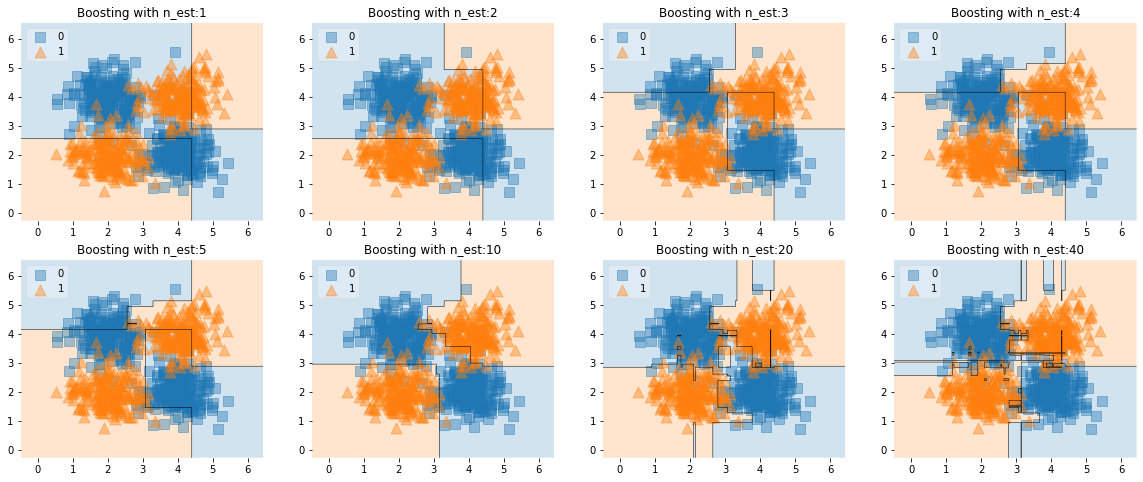

In [32]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]

fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer: With boosting the boundaries achieved are much more curated and nuanced, specially with a higher n_est, thus seperating classes more clearly.  ** </span> 




### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [6]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [35]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [36]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [7]:
X = cancer.data
Y = cancer.target

Number of samples are:

In [41]:
X.shape


(569, 30)

In [58]:
pd.value_counts(Y)

1    357
0    212
dtype: int64

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [46]:
#Linear SVM
SVM = SVC(C=0.5, kernel='linear')
score_linear = cross_val_score(SVM, X, Y, cv=10, scoring='accuracy')
print("Linear SVM Mean accuracy : " +  str(score_linear.mean()) + " Std : " + str(score_linear.std()))

Linear SVM Mean accuracy : 0.9525321925503413 Std : 0.0192226141157179


In [45]:
#Polynomial varying C and degree
c_values = [0.001, 0.01, 0.1, 1] 
degrees = [1,2]

for c in c_values :
    for d in degrees : 
    # SVM_poly = SVC(C=c, kernel='poly',degree=d, gamma = 'auto')
        scores = cross_val_score(SVC(C=c, kernel='poly',degree=d, gamma = 'auto'), X, Y, cv=10, scoring='accuracy')
        print("Polynomial SVM with c = " + str(c) + " and degree = " + str(d) + " : " + "Mean = " + str(scores.mean()) + " Std = " + str(scores.std()))

Polynomial SVM with c = 0.001 and degree = 1 : Mean = 0.9280269639616281 Std = 0.02968518046820524
Polynomial SVM with c = 0.001 and degree = 2 : Mean = 0.9490849969751964 Std = 0.02511818448227461
Polynomial SVM with c = 0.01 and degree = 1 : Mean = 0.9402784979690605 Std = 0.02242540044883814
Polynomial SVM with c = 0.01 and degree = 2 : Mean = 0.957919583441362 Std = 0.027205751687965476
Polynomial SVM with c = 0.1 and degree = 1 : Mean = 0.947266874081756 Std = 0.02482952354062278
Polynomial SVM with c = 0.1 and degree = 2 : Mean = 0.957919583441362 Std = 0.024750796037684784
Polynomial SVM with c = 1 and degree = 1 : Mean = 0.947266874081756 Std = 0.02221239371835221
Polynomial SVM with c = 1 and degree = 2 : Mean = 0.9579509117621638 Std = 0.023506830589711532


In [47]:
#RBF varying C and gamma
c_values = [0.001, 0.01, 0.1, 1]
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
for c in c_values :
    for g in gamma : 
    # SVM_poly = SVC(C=c, kernel='rbf', gamma = g)
        scores = cross_val_score(SVC(C=c, kernel='rbf', gamma = g), X, Y, cv=10, scoring='accuracy')
        print("RBF SVM with c = " + str(c) + " and gamma = " + str(g) + " : " + "Mean = " + str(scores.mean()) + " Std = " + str(scores.std()))


RBF SVM with c = 0.001 and gamma = 0.001 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.001 and gamma = 0.01 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.001 and gamma = 0.1 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.001 and gamma = 1 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.001 and gamma = 10 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.001 and gamma = 100 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.01 and gamma = 0.001 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.01 and gamma = 0.01 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.01 and gamma = 0.1 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.01 and gamma = 1 : Mean = 0.6274274047186933 Std = 0.00441189245975379
RBF SVM with c = 0.01 and gamma = 10 : Mean = 0.6274274047186933 Std = 0.

<span style="color:green">**Answer: Maximum accuracy (0.9579509117621638) is with Polynomial SVM classifier with degree = 2 and c = 1 ** </span> 


<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

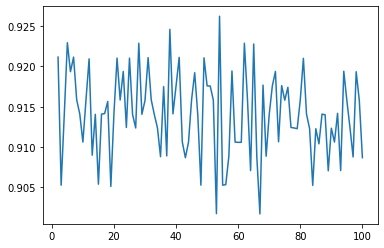

In [27]:
#Plot Max_Depth vs Mean Accuracy
max_depth = np.arange(2,101, 1)
acu = np.array(len(max_depth))
acu_2 = []
for m in max_depth : 
     score = cross_val_score(DecisionTreeClassifier(max_depth=m), X, Y, cv=10, scoring='accuracy').mean()
     acu_2.append(score)  
        
    
plt.plot(max_depth, acu_2)
plt.show()



In [9]:
l1 = list(max_depth)

In [22]:
a = pd.DataFrame((l1, acu_2)).T
a.columns = ['depth', 'accuracy'] 
a.sort_values('accuracy', ascending = False)

,depth,accuracy
60,62.0,0.928062
4,6.0,0.926399
3,5.0,0.924704
88,90.0,0.924673
5,7.0,0.924644
...,...,...
69,71.0,0.903433
41,43.0,0.901710
67,69.0,0.900048
59,61.0,0.898232


<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer: In such a case, precision is far more important than the accuracy. Therefore we can use ROC-AUC method to determine which classifier will best suited ( i.e High TPR and low FPR) for the given data set. ** </span> 


In [24]:
# Defining Classifiers
dt = DecisionTreeClassifier(max_depth=6)
knn =  KNeighborsClassifier()  #Default n_neighbour  = 5
nb = GaussianNB()
# Parameter from question 8a - 8c which gave highest accuracy are chosen for the comparison
svm_linear = SVC(C=0.5, kernel='linear')
svm_poly = SVC(C=1, kernel='poly',degree=2, gamma = 'auto')
svm_rbf = svm_rbf = SVC(C = 1, kernel='rbf', gamma=0.001) 



#Finding AUC Scores
dt_scores = cross_val_score(dt, X, Y, cv=10, scoring='roc_auc').mean()
knn_scores = cross_val_score(knn, X, Y, cv=10, scoring='roc_auc').mean()
nb_scores = cross_val_score(nb, X, Y, cv=10, scoring='roc_auc').mean()
svm_linear_scores = cross_val_score(svm_linear,  X, Y, cv=10, scoring='roc_auc').mean()
svm_poly_scores = cross_val_score(svm_poly,  X, Y, cv=10, scoring='roc_auc').mean()
svm_rbf_scores = cross_val_score(svm_rbf,  X, Y, cv=10, scoring='roc_auc').mean()

# Model list

model = ['dt', 'knn', ' nb', 'svm_linear', 'svm_poly', 'svm_rbf' ]

# AUC Score list
score = [dt_scores,knn_scores,nb_scores,svm_linear_scores,svm_poly_scores,svm_rbf_scores]

for s,m in zip(score, model) : 
    print("AUC for " + str(m) + " : " + str(s))

AUC for dt : 0.9101238576238577
AUC for knn : 0.9610561396275681
AUC for  nb : 0.9882972582972582
AUC for svm_linear : 0.9902714216999933
AUC for svm_poly : 0.9845205455919741
AUC for svm_rbf : 0.9595593692022263


I will choose linear SVM classifier for this dataset as its auc score is the highest. 
